## BINARY CLASSIFICATION

Predictive modelling is a revolution in the field of artificial intelligence. With the use of proper learning algorithms and advanced statistical techniques, it is possible to create extremely powerful and accurate models that can predict just about anything. Binary classification, as its name suggests, is a problem statement in which a model is tasked with predicting the value of a variable such that the variable can have only one of possible two values. For example, predicting if a particular day will have a maximum temperature of 30 degree celsius is a binary classification problem because there can be only two possible answers to this question: Yes or No. In this article, I have tried to delve into the depths of another binary classification problem and made an attempt to create a basic predictive model.

## INTRODUCTION

This notebook has been made as an attempt to analyze the data about heart related conditions of various patients.
After analyzing the data, an attempt has been made to predict the possibility of a person having heart disease based on the given attributes. The starting point of this journey is the analysis of the given data using different visualization techniques. Gradually, we move onto the process of modelling in which we try out diffrent algorithms to predict the occurrence of heart disease based on the given attributes. A number of models are tried and one of them is shortlisted for further fine-tuning based on its accuracy. The selected model is used to find out the most significant variables that contribute to a correct prediction.
The final model uses only the most important variables to predict whether a person has a heart disease or not.

## DATA

Data for this project is collected from the link mentioned below. The entire dataset is split into training and validation parts. The training part of the dataset is used to train the model and the validation part of the dataset is used to test the accuracy of the model. Validation data is necessary to gauge the performance of the model when it deals with completely unknown data. This gives a rough idea about how the model will perform in real life.

The link for the complete dataset is:

https://www.kaggle.com/cherngs/heart-disease-cleveland-uci

## DATA DICTIONARY

Data dictionary is like the legend. It describes what each variable in the dataset stands for. The data dictionary of our dataset is explained as follows:

There are 14 features. The first 13 are the variables. The 14th feature, "condition", is our **prediction target**.

1.  **age**: age in years


2.  **sex**: sex (1 = male; 0 = female)


3.  **cp**: chest pain type
    *  Value 0: typical angina
    *  Value 1: atypical angina
    *  Value 2: non-anginal pain
    *  Value 3: asymptomatic
    
    
4.  **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
              anything above 130-140 is typically cause for concern.
              
              
5.  **chol**: serum cholestoral in mg/dl
              serum = LDL + HDL + .2 * triglycerides,
              above 200 is cause for concern
              
          
6.  **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
             >126 mg/dL signals diabetes.
             

7.  **restecg**: resting electrocardiographic results
    *  Value 0: normal
    *  Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                - can range from mild symptoms to severe problems.
                - signals non-normal heart beat.
    *  Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria.
                Enlarged heart's main pumping chamber.
                
    
8.  **thalach**: maximum heart rate achieved


9.  **exang**: exercise induced angina (1 = yes; 0 = no)


10. **oldpeak** : ST depression induced by exercise relative to rest
                  Looks at stress of heart during excercise.
                  Unhealthy heart will stress more.
                  

11. **slope**: the slope of the peak exercise ST segment
               * 0: Upsloping: better heart rate with excercise (uncommon).
               * 1: Flatsloping: minimal change (typical healthy heart).
               * 2: Downsloping: signs of unhealthy heart.
               
    
12. **ca**: number of major vessels (0-3) colored by flouroscopy
            Colored vessel means the doctor can see the blood passing through.
            The more blood movement the better (no clots).
            

13. **thal**: Thalium stress result.
        0 = normal; 
        1 = fixed defect; 
        2 = reversable defect
        
 
14. **condition**: 
             0 = no disease;
             1 = disease

## END GOAL

The 2 main purposes of this project are:
* To create a model which can predict the presence of heart disease with a reasonable accuracy (TARGETED ACCURACY:85%).
* To find out which of the given variables have a critical contribution towards a heart ailment.

## IMPORTING REQUIRED LIBRARIES AND METHODS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## LOADING THE DATA

In [3]:
df = pd.read_csv('heart_cleveland_upload.csv')
## Reading the CSV file as a pandas DataFrame
df.shape 
## Checking the dimensions of the DataFrame (Rows:297,Columns:14)

(297, 14)

## EXPLORATORY DATA ANALYSIS

POINTS TO BE ADDRESSED:
  * What kind of data do we have and how do we treat them differently?
  * Is there any missing data? If yes then how do we deal with it?
  * How does the presence of outliers affect the data?
  * How do some individual features affect our prediction target?
    

In [4]:
df.head() 
## Looking at the first 5 rows of the entire dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
df.condition.value_counts() 
## Checking the number of cases of heart disease in the entire dataset

0    160
1    137
Name: condition, dtype: int64

Text(0, 0.5, 'No. of patients')

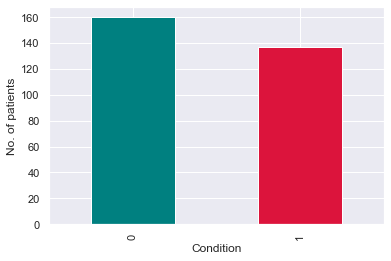

In [6]:
df['condition'].value_counts().plot(kind='bar', color=['teal','crimson']);
plt.xlabel('Condition')
plt.ylabel('No. of patients')

**INFERENCE**: Out of the 297 entries in the dataset, 160 patients don't have any heart disease and 137 patients suffer from heart ailments

In [7]:
df.info() ## Checking some general information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


**INFERENCE**: Since the non-null count of each variable is 297, there are no missing values in the dataset

In [8]:
df.describe() ## A brief statistical summary of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


**INFERENCES**:
* Average age of all patients in the dataset is 54.54 years.
* Average of the sex column is 0.68 which indicates that male patients slightly outnumber the female patients in the dataset.
* The age range of the patients in the dataset is from 29 to 77. 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

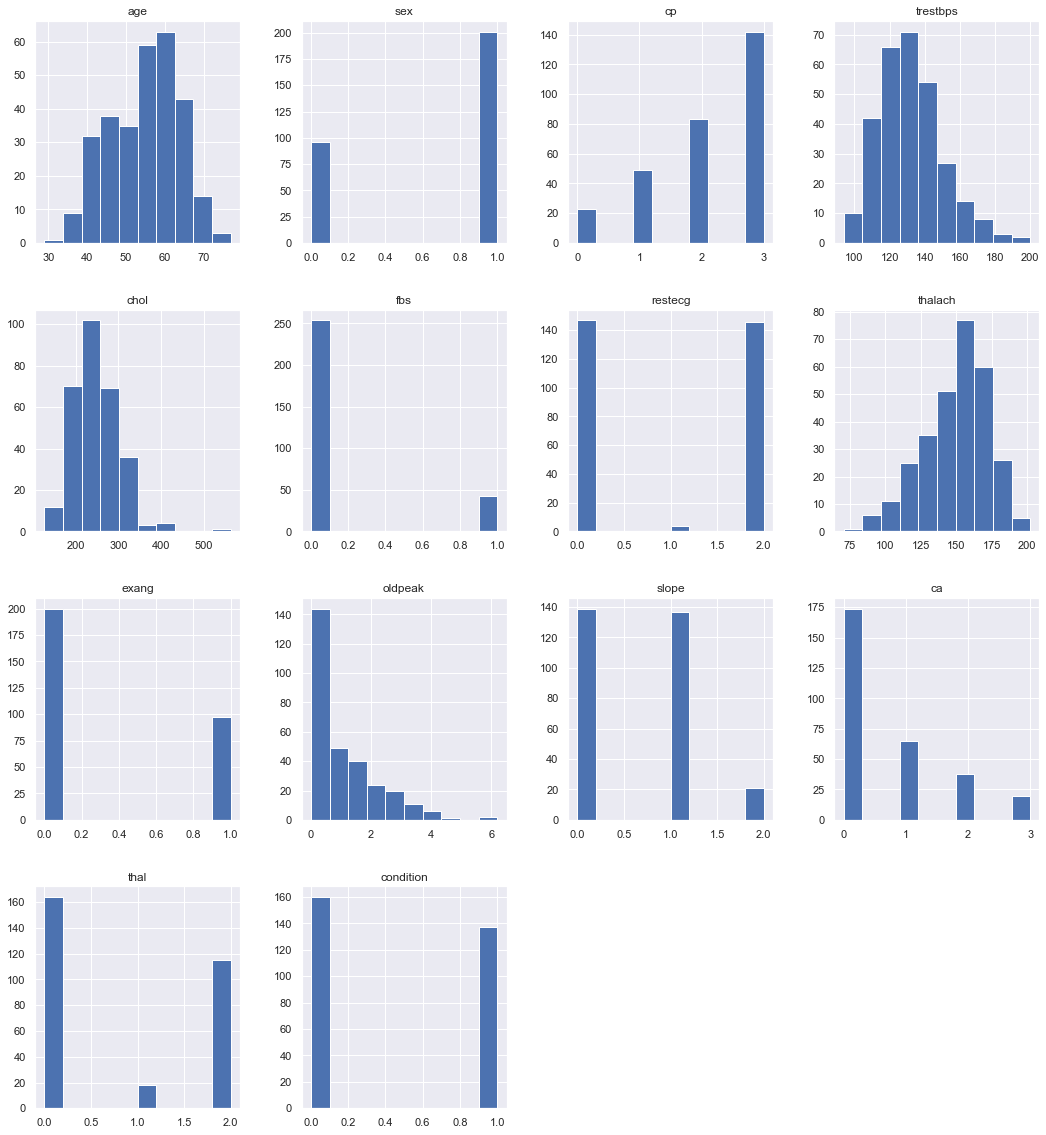

In [9]:
df.hist(figsize=(18,20)) ## Checking the overall distribution of all variables

**INFERENCE**: 
* The dataset contains both numerical and categorical data.

**NUMERIC DATA**:
* ***age***: Follows normal distribution approximaely. Most of the patients are 50 to 70 years old.
* ***trestbps***: Follows normal distrubution approximately but there are a few outliers in the range of 170 to 200.
* ***chol***: Follows normal distribution approximately. Very few outliers are present, some in the range 350-420 and very few above 500
* ***thalach***: This too can be approximated as a normal distribution. Outliers are present in the range 75-100 and some around 200

**CATEGORICAL DATA**:
* ***sex***: The number of male patients is more than twice the number of female patients in the dataset. This non-uniformity can introduce some deviations in our analysis if sex and condition are found to be strongly related.
* ***fbs***: Most of the patients in our dataset are non-diabetic. For increasing our accuracy, we might have to include more diabetic patients in our analysis.
* ***exang***: Most of the patients do not suffer from exercise induced angina. This is yet another skewness in our data which might affect the accuracy of our model.
* ***slope***: Very few patients have a downsloping condition.


This brief overview of our data suggests that there is still scope for improving the dataset. Some suggestions for improvement are as follows:
* Removal of outliers from numeric data wherever possible.
* Inclusion of a greater number of female participants in the dataset.
* Inclusion of more diabetic patients in the dataset.
* Inclusion of more patients having exercise induced angina.

## CORRELATION MATRIX AND ITS VISUALISATION

The correlation matrix helps us to understand the interrelation between our features as well as between different features and our prediction target. This will give us some preliminary insight into the most and the least significannt features. There are two types of correlations that can occur:

* **POSITIVE CORRELATION**: Two variables are said to be postively correlated when increase in one leads to an increase in the other and a decrease in one leads to a decrease in the other.

* **NEGATIVE CORRELATION**: Two variables are said to be negatively correlated when increase in one leads to a decrease in the other and a decrease in one leads to an increase in the other.


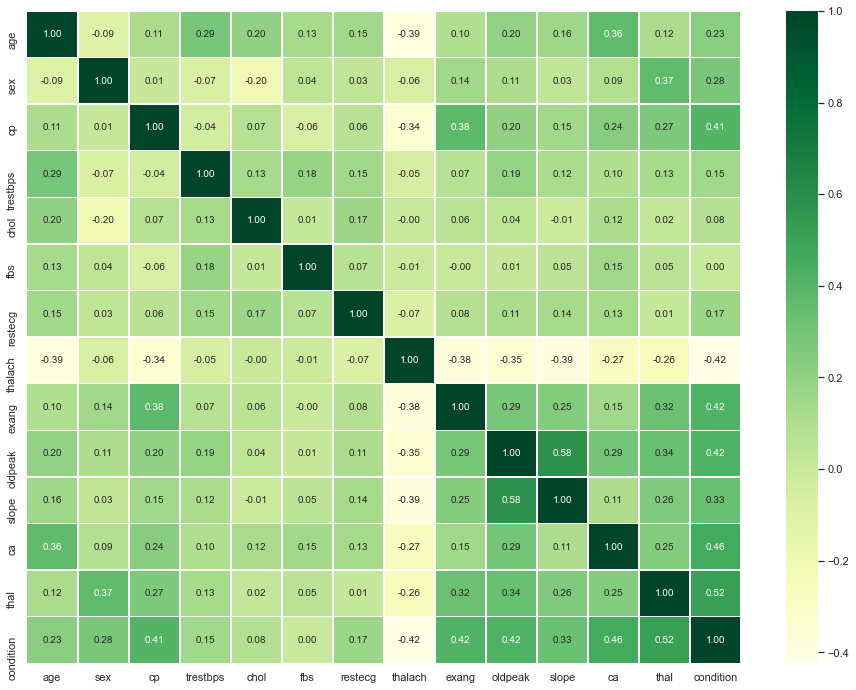

In [10]:
## Constructing the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt=".2f", cmap='YlGn')

The darker shades of green represent strong positive correlation whereas the lighter shades tending towards white indicate strong negative correlation. The colourbar on the right shows that 1 is the maximum correlation value attained whereas the minimum value lies somewhere around -0.4. Correlation of 1 is obtained when a variable is compared to itself.

**NOTABLE INFERENCES**:
* Thalium induced stress(thal) has a strong postive correlation (0.52) with condition.
* Other features showing a strong positive correlation with condition are:
  1. Number of major vessels coloured by fluoroscopy(ca): 0.46
  2. Exercise induced angina(exang):0.42
  3. ST depression induced by exercise(oldpeak):0.42
  4. Type of chest pain(cp):0.41
* Maximum heart rate achieved(thalach) has a strong negative correlation (-0.42) with condition.


## MAJOR VESSELS COLOURED BY FLUOROSCOPY V/S CONDITION

In [11]:
pd.crosstab(df.ca, df.condition)  ## making a cross-table

condition,0,1
ca,,
0,129,45
1,21,44
2,7,31
3,3,17


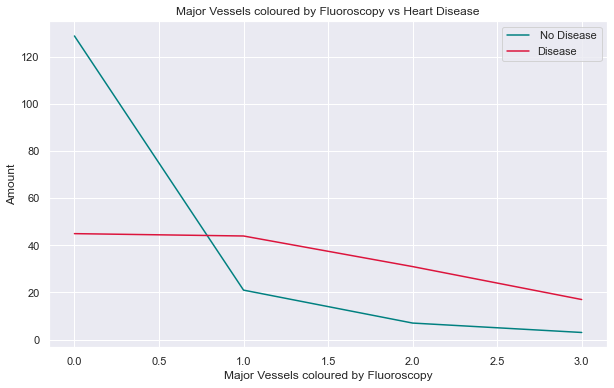

In [12]:
## Visualizing the crosstable
pd.crosstab(df.ca, df.condition).plot(kind='line', figsize=(10,6), color=['teal','crimson'])

plt.title(
 'Major Vessels coloured by Fluoroscopy vs Heart Disease'
)

plt.xlabel(
    'Major Vessels coloured by Fluoroscopy'
)

plt.ylabel('Amount')
plt.legend([' No Disease', 'Disease'])

In [13]:
## Modifying cross-table
df1 = pd.DataFrame(pd.crosstab(df.ca, df.condition))
disease = df1.loc[:,1]
no_disease = df1.loc[:,0]
df1['Ratio: 1/0'] = disease/no_disease
## Ratio of people having heart disease to people not having
df1

condition,0,1,Ratio: 1/0
ca,,,
0,129,45,0.348837
1,21,44,2.095238
2,7,31,4.428571
3,3,17,5.666667


Text(0, 0.5, 'Major vessels coloured by fluoroscopy')

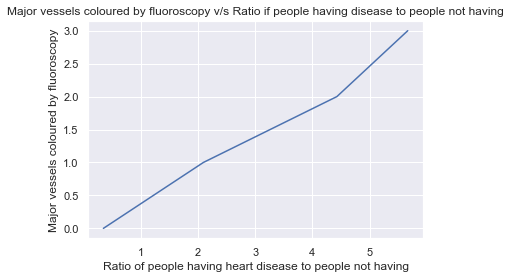

In [14]:
plt.plot(df1['Ratio: 1/0'],range(0,4)) 
# Plotting this ratio against major vessels coloured by fluoroscopy

plt.title(
    'Major vessels coloured by fluoroscopy v/s Ratio if people having disease to people not having'
)

plt.xlabel(
    'Ratio of people having heart disease to people not having'
)

plt.ylabel('Major vessels coloured by fluoroscopy')

**INFERENCES**:

* The first plot indicates that majority of the patients have either 0 or 1 vessels coloured by fluoroscopy. Comparatively fewer patients have 3 or 4 vessels coloured.
* As the number of vessels coloured increases, there is a  decreasing trend in both the patients having heart disease as well as patients free from heart disease.
* The second plot indicates that as the number of vessels coloured by fluoroscopy increases, there is an almost linear increase in the ratio of patients having a heart disese to the patients not having any heart disease.
*A medical expert might be able to enlighten us with reasons for the trends being observed.

## CHEST PAIN TYPE V/S CONDITION

In [15]:
pd.crosstab(df.cp, df.condition)

condition,0,1
cp,,
0,16,7
1,40,9
2,65,18
3,39,103


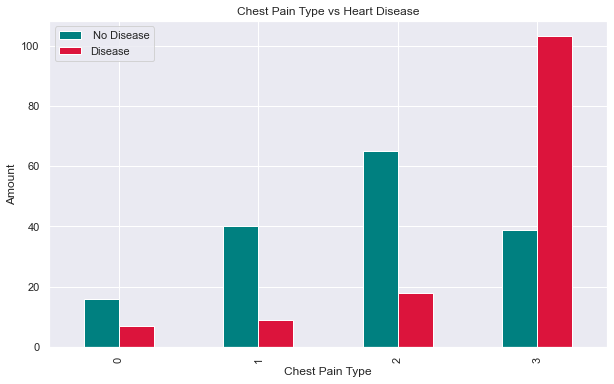

In [16]:
## CROSSTAB VISUALIZATION 
pd.crosstab(df.cp, df.condition).plot(kind='bar', 
                                      figsize=(10,6), 
                                      color=['teal','crimson'])

plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend([' No Disease', 'Disease'])

**Chest Pain Types**:(FROM DATA DICTIONARY)

* Value 0: typical angina
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: asymptomatic

**INFERENCES**:
* As seen in the above plot, having asypmtomatic chest pain greatly increases a person's chance of having a heart disease

We know that the older a person becomes, the older his/her heart becomes. Hence it might be possible to get some insights into the data if we plot the age and chest pain type together and check the variation in condition.


## RELATION BETWEEN AGE AND CHEST PAIN TYPE FOR DETERMINING CONDITION

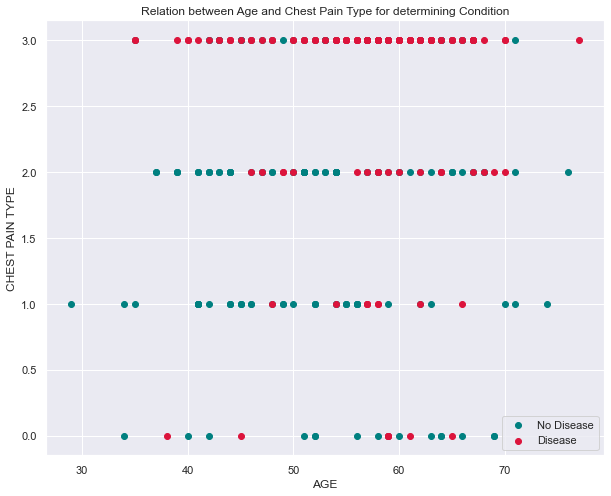

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(df.age[df.condition==0],df.cp[df.condition==0], color='teal')
plt.scatter(df.age[df.condition==1], df.cp[df.condition==1], color='crimson')


plt.title('Relation between Age and Chest Pain Type for determining Condition')
plt.xlabel('AGE')
plt.ylabel('CHEST PAIN TYPE')
plt.legend(['No Disease','Disease'])

**INFERENCES**:
* From the above plot, 2 groups of people can be identified who tend to be highly susceptible to heart diseases:
    1. People in the age group (40-70) having asymptomatic chest pain.
    2. People in the age group (55-70) having non anginal chest pain.

## RELATION BETWEEN AGE AND MAXIMUM HEART RATE ACHIEVED

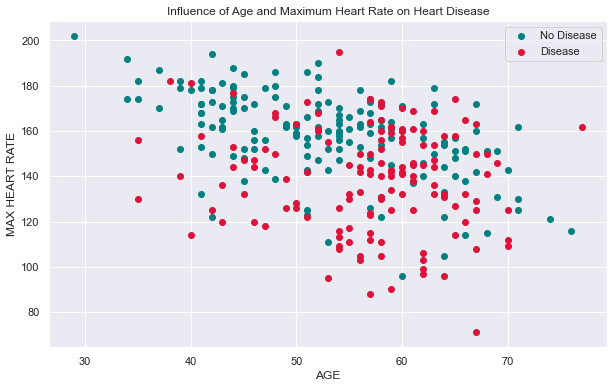

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.condition==0],df.thalach[df.condition==0], color='teal')
plt.scatter(df.age[df.condition==1], df.thalach[df.condition==1], color='crimson')

plt.title('Influence of Age and Maximum Heart Rate on Heart Disease')
plt.xlabel('AGE')
plt.ylabel('MAX HEART RATE')
plt.legend(['No Disease','Disease'])


This plot does not give us any concrete quantitative conclusion, however a general inference that can be made is:
* Older people having lower values of maximum heart rate are more likely to suffer from a heart ailment.

## MODELLING

In this section, our goal is to make a predictive model for determining the value of condition based on the input features.
Since this is a binary classification problem, we will try some classification algorithms provided by Sci-kit Learn python.
The algorithms that we will try are:

* LOGISTIC REGRESSION
* K-NEIGHBORS CLASSIFIER
* RANDOM FOREST
* GRADIENT BOOSTING CLASSIFIER
* BAGGING CLASSIFIER
* ADA BOOST CLASSIFIER
* EXTRA TREES CLASSIFIER

In [19]:
X = df.drop('condition', axis=1)
y = df.condition

In [20]:
## Splitting data into training and test
np.random.seed(42)

test_X, train_X, test_y, train_y = train_test_split(X,y,test_size=0.2)

In [21]:
# CREATING A DICTIONARY OF POSSIBLE MODELS TO BE USED

models = {'Logistic Regression':LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'Random Forest':RandomForestClassifier(),
          'GBClassifier':GradientBoostingClassifier(), 
          'BClassifier':BaggingClassifier(), 
          'ABClassifier':AdaBoostClassifier(),
          'ETClassifier':ExtraTreesClassifier()}

## DEFINING A FUNCTION CONTAININg ALL 3 MODELS

def fit_and_score(models, test_X, train_X, test_y, train_y):
    """
    For fitting and evaluating different machine learning models
    models: A dictionary of sk learn ML models relevant to the problem
    test_X: Testing data features
    train_X: Training data features
    test_y: Testing Target
    train_y: Training Target
    """
    ## Setting a random seed
    np.random.seed(42)
    
    ## Empty dictionary to store all model scores
    model_scores={}
    ## Looping through all models
    for name, model in models.items():
        ## Fitting each model with training data
        model.fit(train_X,train_y)
        ## Evaluating each model with test data
        model_scores[name]=model.score(test_X,test_y)
    return model_scores

In [22]:
models = fit_and_score(models, test_X, train_X, test_y, train_y)
models

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8354430379746836,
 'KNN': 0.5738396624472574,
 'Random Forest': 0.8016877637130801,
 'GBClassifier': 0.759493670886076,
 'BClassifier': 0.7848101265822784,
 'ABClassifier': 0.6919831223628692,
 'ETClassifier': 0.8143459915611815}

## MODEL COMPARISON

<AxesSubplot:>

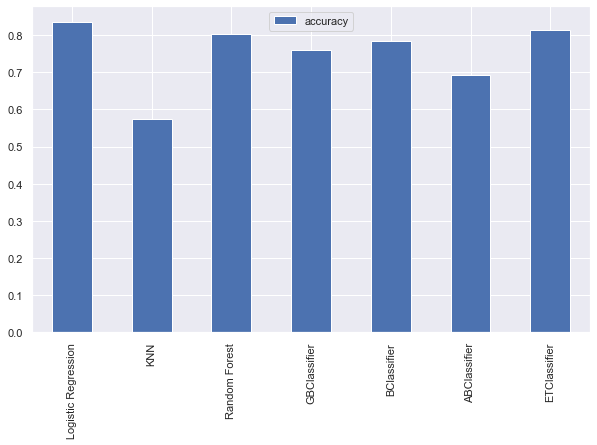

In [23]:
model_compare = pd.DataFrame(models, index=['accuracy'])
model_compare.T.plot.bar(figsize=(10,6))

Our aim is to create a model with at least 85% accuracy. Hence, from the plot, we will only proceed with the tuning of models that have a high accuracy for this dataset. From the chart, the three most highly accurate models for the given dataset are:

* Logistic Regression (83.54%)
* Extra Trees Classifier (81.43%)
* Random Forest Classifier (80.16%)

Hyperparameter tuning is necessary to improve the performance of our model. Each algorithm has a set of parameters which are assigned certain values. Changing the values of these parameters results in slight changes in the working of the algorithms and the results vary accordingly. **CROSS VALIDATION** is a useful technique to evaluate the performance of our model. Training the model on a given set of parameters and testing it on the same parameters is a mistake as we will always get the correct output for the training dataset, but we will never know how the model performed on data that is previously unknown to it.

In **CROSS VALIDATION**, the training dataset is divided into 'k' smaller sets and the following process is followed for each of the 'k' subsets:
* The model is trained using 'k-1' of the subsets.
* The resulting model is validated on the remaining 1 subset.

The performance metrics thus measured would be the average of the values computed in the loop. This process is a little expensive computationally, but it makes sure that not much of the data is wasted.

# MODEL IMPROVEMENT BY HYPERPARAMETER TUNING 

### Hyperparameter tuning is done for the three models using GridSearchCV, which is a Cross Validation approach implemented in scikit learn.



## RANDOM FOREST CLASSIFIER

In [24]:
# Recreating a hyperparameter grid for GridSearch CV
rf_grid1 = {##'n_estimators': np.arange(10,15,4),
           ##'min_samples_split': np.arange(2,4,1),
           'min_samples_leaf': np.arange(1,20,2),       ## Tuning hypeparameters
           'max_leaf_nodes':np.arange(10,30,4),
           ##'min_impurity_decrease':np.arange(10,50,5)
           }
np.random.seed(42)

gd_rf= GridSearchCV(RandomForestClassifier(),
                               param_grid = rf_grid1,
                               cv=14,                   ## Implementing GridSearchCV
                               verbose=True)

#Fitting the Model on training data
gd_rf.fit(train_X,train_y)



Fitting 14 folds for each of 50 candidates, totalling 700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:  1.8min finished


GridSearchCV(cv=14, estimator=RandomForestClassifier(),
             param_grid={'max_leaf_nodes': array([10, 14, 18, 22, 26]),
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
             verbose=True)

In [25]:
print('BEST PARAMETERS FOR RANDOM FORESTS:'+str(gd_rf.best_params_)) 
## Identifying best parameters

BEST PARAMETERS FOR RANDOM FORESTS:{'max_leaf_nodes': 10, 'min_samples_leaf': 5}


In [26]:
print('MODEL SCORE ON TEST DATA:'+str(gd_rf.score(test_X,test_y))) 
## Score of model on test data

MODEL SCORE ON TEST DATA:0.8227848101265823


## EXTRA TREES CLASSIFIER

In [27]:
# Recreating a hyperparameter grid for GridSearch CV
et_grid={'n_estimators': np.arange(100,200,10),
         ##'min_samples_leaf': np.arange(1,20,2),        ## Tuning hypeparameters
         'max_leaf_nodes':np.arange(10,30,4),
        }

In [28]:
np.random.seed(42)

gd_et= GridSearchCV(ExtraTreesClassifier(),
                               param_grid = et_grid,
                               cv=10,                   ## Implementing GridSearchCV
                               verbose=True)

#Fitting the Model on training data
gd_et.fit(train_X,train_y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.7min finished


GridSearchCV(cv=10, estimator=ExtraTreesClassifier(),
             param_grid={'max_leaf_nodes': array([10, 14, 18, 22, 26]),
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])},
             verbose=True)

In [29]:
print('BEST PARAMETERS FOR EXTRA TREES CLASSIFIER:'+str(gd_et.best_params_))  
## Identifying best parameters

BEST PARAMETERS FOR EXTRA TREES CLASSIFIER:{'max_leaf_nodes': 10, 'n_estimators': 120}


In [30]:
print('MODEL SCORE ON TEST DATA:'+str(gd_et.score(test_X,test_y)))  
## Score of model on test data

MODEL SCORE ON TEST DATA:0.8438818565400844


## LOGISTIC REGRESSION

In [31]:
# Recreating a hyperparameter grid for GridSearch CV
log_reg_grid1 = {'C': np.logspace(-2,2,30),
               'solver':['liblinear']}                  ## Tuning hypeparameters
np.random.seed(42)

gd_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid1,
                         cv=14, verbose=True)           ## Implementing GridSearchCV

gd_log_reg.fit(train_X, train_y)


Fitting 14 folds for each of 30 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    2.7s finished


GridSearchCV(cv=14, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-02, 1.37382380e-02, 1.88739182e-02, 2.59294380e-02,
       3.56224789e-02, 4.89390092e-02, 6.72335754e-02, 9.23670857e-02,
       1.26896100e-01, 1.74332882e-01, 2.39502662e-01, 3.29034456e-01,
       4.52035366e-01, 6.21016942e-01, 8.53167852e-01, 1.17210230e+00,
       1.61026203e+00, 2.21221629e+00, 3.03919538e+00, 4.17531894e+00,
       5.73615251e+00, 7.88046282e+00, 1.08263673e+01, 1.48735211e+01,
       2.04335972e+01, 2.80721620e+01, 3.85662042e+01, 5.29831691e+01,
       7.27895384e+01, 1.00000000e+02]),
                         'solver': ['liblinear']},
             verbose=True)

In [32]:
print('BEST PARAMETERS FOR LOGISTIC REGRESSION:'+str(gd_log_reg.best_params_))

BEST PARAMETERS FOR LOGISTIC REGRESSION:{'C': 0.06723357536499334, 'solver': 'liblinear'}


In [33]:
print('MODEL SCORE ON TEST DATA:'+str(gd_log_reg.score(test_X,test_y)))

MODEL SCORE ON TEST DATA:0.8481012658227848


## EVALUATION BEYOND ACCURACY

For a classification problem like this one, model score on test data is not the only performance metric that should be used to gauge the effectiveness of the model. Other performance metrics that should also be determined to judge a classification model are:

* ROC Curve and AUC(Area Under Curve) Score
* Confusion Matrix
* Precision
* Recall
* F1-Score

To compare and evaluate, we need to make predictions first


In [34]:
## Making predictions using Test Data --- EXTRA TREES CLASSIFIER

y_preds1 = gd_et.predict(test_X)
y_preds1

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [35]:
## Making predictions using Test Data --- LOGISTIC REGRESSION

y_preds2 = gd_log_reg.predict(test_X) 
y_preds2

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [36]:
test_y ## Actual condition values from test dataset

273    1
259    1
30     0
22     0
277    1
      ..
188    0
71     0
106    1
270    1
102    0
Name: condition, Length: 237, dtype: int64

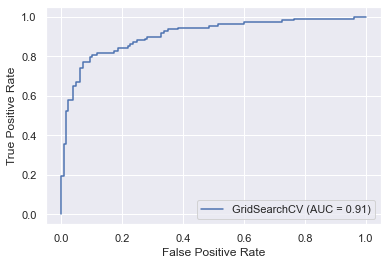

In [37]:
# Plotting ROC Curve and calculating AUC Metric --- EXTRA TREES CLASSIFIER
plot_roc_curve(gd_et, test_X, test_y)

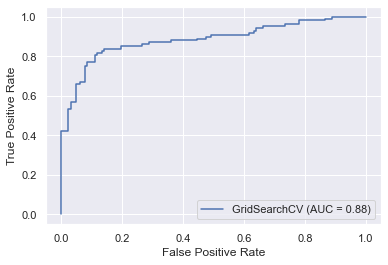

In [38]:
# Plotting ROC Curve and calculating AUC Metric --- LOGISTIC REGRESSION
plot_roc_curve(gd_log_reg, test_X, test_y)


Although the logistic regression model is slightly more accurate than the extra trees classifier, the area under the ROC curve for extra trees classifier is **0.91** which is greater than the **0.88** which is the value for logistic regression. We will therefore look at a few more metrics to compare these two models and finally decide which one to use for our prediction.

# CONFUSION MATRIX

The confusion matrix gives us a quantitative insight into the accuracy of our model. It identifies the anomalies as:
* **False Negatives**: When the patient has a heart problem in reality, but the model predicts otherwise.
* **False Positives**: When the patient does not have a heart problem, but the model predicts otherwise.

In our case, having false negatives is **worse** than having false positives.

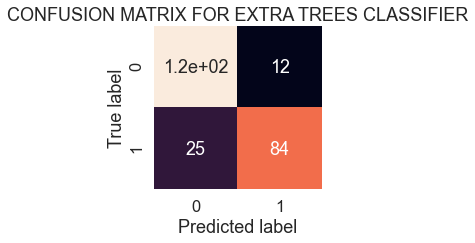

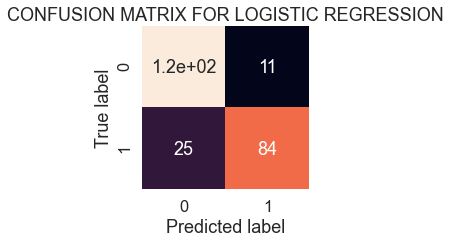

In [39]:

## Confusion Matrix

sns.set(font_scale=1.5)

def plot_conf_mat(test_y, y_preds1, y_preds2):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax1 = plt.subplots(figsize=(3, 3))
    ax1 = sns.heatmap(confusion_matrix(test_y, y_preds1),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.title('CONFUSION MATRIX FOR EXTRA TREES CLASSIFIER')
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
    fig, ax2 = plt.subplots(figsize=(3, 3))
    ax2 = sns.heatmap(confusion_matrix(test_y, y_preds2),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.title('CONFUSION MATRIX FOR LOGISTIC REGRESSION')
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(test_y, y_preds1, y_preds2)

From the confusion matrices of the two models it is evident that our model is **exceptionally** accurate at predicting the **absence of heart problems** ie (true label = 0 and predicted label = 0)

However they do give us some false positives and false negatives.

## CLASSIFICATION REPORT FOR BOTH MODELS

The classification report for both models gives us an overview of the following metrics:
* Precision
* Recall
* F1-Score

In [40]:
print('CLASSIFICATION REPORT FOR EXTRA TREES CLASSIFIER')
print(classification_report(test_y,y_preds1))
print("-----------------------------------------------------------------------------------------------------------------")
print('CLASSIFICATION REPORT FOR LOGISTIC REGRESSION')
print(classification_report(test_y,y_preds2))

CLASSIFICATION REPORT FOR EXTRA TREES CLASSIFIER
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       128
           1       0.88      0.77      0.82       109

    accuracy                           0.84       237
   macro avg       0.85      0.84      0.84       237
weighted avg       0.85      0.84      0.84       237

-----------------------------------------------------------------------------------------------------------------
CLASSIFICATION REPORT FOR LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       128
           1       0.88      0.77      0.82       109

    accuracy                           0.85       237
   macro avg       0.85      0.84      0.85       237
weighted avg       0.85      0.85      0.85       237



From the two reports above, we can see that both our models have a very high value for all the metrics. However we have to choose any one of them for making our final predictions. In the following section of the notebook, we will figure out which model we are finally going to use. We will use the pre-determined best parameter values for both models and calculate the performance metrics again.

In [41]:
## Calculate Evaluation Metrics using Cross Validation

## Checking Best Parameters

print('BEST PARAMETERS FOR EXTRA TREES CLASSIFER:'+ str(gd_et.best_params_))           
## BEST PARAMETERS FOR EXTRA TREES CLASSIFER
print('BEST PARAMETERS FOR LOGISTIC REGRESSION:'+ str(gd_log_reg.best_params_))     
## BEST PARAMETERS FOR LOGISTIC REGRESSION

BEST PARAMETERS FOR EXTRA TREES CLASSIFER:{'max_leaf_nodes': 10, 'n_estimators': 120}
BEST PARAMETERS FOR LOGISTIC REGRESSION:{'C': 0.06723357536499334, 'solver': 'liblinear'}


In [42]:
## Creating a Classifier using the best parameters

clf1 = ExtraTreesClassifier(max_leaf_nodes=10, n_estimators=120)
clf2 = LogisticRegression(C=0.06723357536499334, solver='liblinear')

In [43]:
## Cross validated Accuracy

cv_acc_et = cross_val_score(clf1,X,y,cv=10,scoring='accuracy')

cv_acc_et = np.mean(cv_acc_et)

cv_acc_log_reg = cross_val_score(clf2,X,y,cv=10,scoring='accuracy')

cv_acc_log_reg = np.mean(cv_acc_log_reg)

print('CROSS VALIDATED ACCURACY FOR EXTRA TREES CLASSIFIER:'+' '+ str(cv_acc_et))
print('CROSS VALIDATED ACCURACY FOR LOGISTIC REGRESSION:'+' '+ str(cv_acc_log_reg))


CROSS VALIDATED ACCURACY FOR EXTRA TREES CLASSIFIER: 0.8179310344827586
CROSS VALIDATED ACCURACY FOR LOGISTIC REGRESSION: 0.8418390804597703


In [44]:
## Cross validated precision
cv_precision_et = cross_val_score(clf1,X,y,cv=10,scoring='precision')

cv_precision_et = np.mean(cv_precision_et)

cv_precision_log_reg = cross_val_score(clf2,X,y,cv=10,scoring='precision')

cv_precision_log_reg = np.mean(cv_precision_log_reg)

print('CROSS VALIDATED PRECISION FOR EXTRA TREES CLASSIFIER:'+' '+ str(cv_precision_et))
print('CROSS VALIDATED PRECISION FOR LOGISTIC REGRESSION:'+' '+ str(cv_precision_log_reg))


CROSS VALIDATED PRECISION FOR EXTRA TREES CLASSIFIER: 0.8326976944624004
CROSS VALIDATED PRECISION FOR LOGISTIC REGRESSION: 0.8609993927640985


In [45]:
## Cross validated Recall
cv_rec_et = cross_val_score(clf1,X,y,cv=10,scoring='recall')

cv_rec_et = np.mean(cv_rec_et)

cv_rec_log_reg = cross_val_score(clf2,X,y,cv=10,scoring='recall')

cv_rec_log_reg = np.mean(cv_rec_log_reg)

print('CROSS VALIDATED RECALL FOR EXTRA TREES CLASSIFIER:'+' '+ str(cv_rec_et))
print('CROSS VALIDATED RECALL FOR LOGISTIC REGRESSION:'+' '+ str(cv_rec_log_reg))


CROSS VALIDATED RECALL FOR EXTRA TREES CLASSIFIER: 0.7692307692307693
CROSS VALIDATED RECALL FOR LOGISTIC REGRESSION: 0.7758241758241758


In [46]:
## Cross validated F1-score
cv_f1_et= cross_val_score(clf1,X,y,cv=10,scoring='f1')

cv_f1_et = np.mean(cv_f1_et)

cv_f1_log_reg = cross_val_score(clf2,X,y,cv=10,scoring='f1')

cv_f1_log_reg = np.mean(cv_f1_log_reg)

print('CROSS VALIDATED F1-SCORE FOR EXTRA TREES CLASSIFIER:'+' '+ str(cv_f1_et))
print('CROSS VALIDATED F1-SCORE FOR LOGISTIC REGRESSION:'+' '+ str(cv_f1_log_reg))



CROSS VALIDATED F1-SCORE FOR EXTRA TREES CLASSIFIER: 0.7796927899686519
CROSS VALIDATED F1-SCORE FOR LOGISTIC REGRESSION: 0.7959766771430058


<AxesSubplot:title={'center':'Cross Validated Classification Metrics'}>

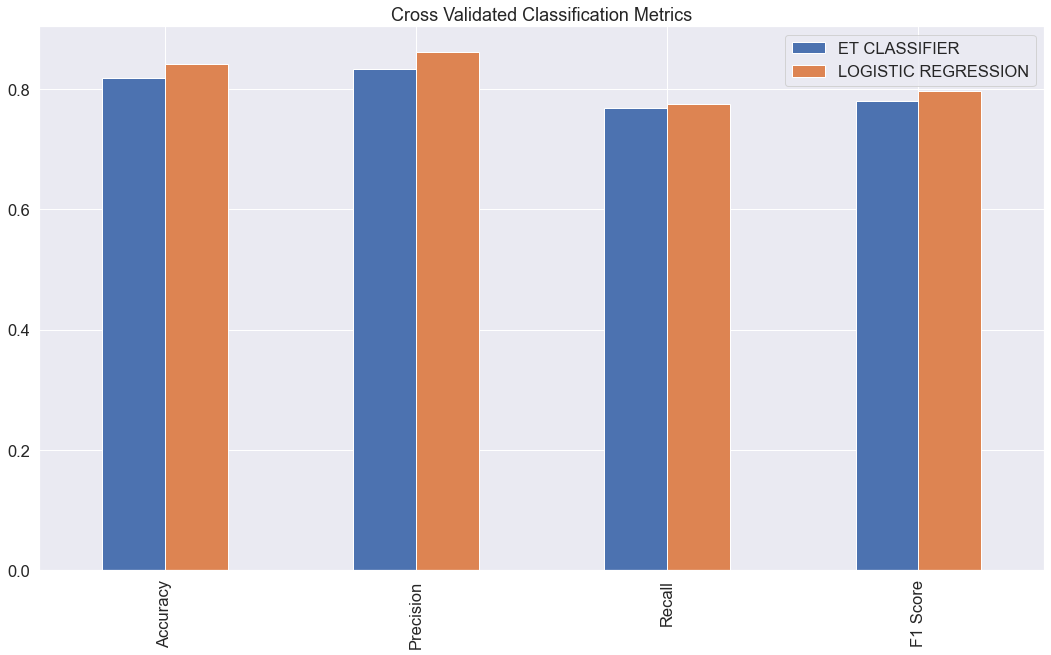

In [47]:
# Visualize cross validated metrics

cv_metrics = pd.DataFrame({'Accuracy':[cv_acc_et,cv_acc_log_reg],
                           'Precision':[cv_precision_et,cv_precision_log_reg], 
                           'Recall':[cv_rec_et,cv_rec_log_reg], 
                           'F1 Score':[cv_f1_et,cv_f1_log_reg]}, 
                          index=['ET CLASSIFIER','LOGISTIC REGRESSION'])

cv_metrics.T.plot.bar(title='Cross Validated Classification Metrics', figsize=(18,10), legend=True)

The above plot once again shows us that there is very little to distinguish between our models. Hence we cannot yet pick decisively the model that we will use for making our final predictions. 

Now we will try to perform a test to determine the most significant parameters of the **13** given parameters that contribute to predict the presence of a heart problem.

## FEATURE IMPORTANCE TEST

To determine which features contributed the most to the outcome of the model and how

In [48]:
clf1 = ExtraTreesClassifier(max_leaf_nodes=10, n_estimators=120)
clf1.fit(train_X,train_y)                 ## Setting up Extra Trees Classifier


ExtraTreesClassifier(max_leaf_nodes=10, n_estimators=120)

In [49]:
clf2 = LogisticRegression(C=0.06723357536499334, solver='liblinear')
clf2.fit(train_X,train_y)               ## Setting up Logistic Regression

LogisticRegression(C=0.06723357536499334, solver='liblinear')

In [50]:
fimp1=clf1.feature_importances_  ## Importance for Extra Trees Classifier

fimp2=clf2.coef_                 ## Importance for Logistic Regression




In [51]:
feat = df.columns.drop('condition')
features_imp = pd.DataFrame({'Features':feat, ' ET Importance':fimp1, 'LR Importance':fimp2.flatten()})
features_imp  ## Visualizing Feature Importances

,Features,ET Importance,LR Importance
0,age,0.036868,-0.008982
1,sex,0.025749,-0.029300
2,cp,0.225899,0.437959
3,trestbps,0.038420,0.010941
4,chol,0.043561,-0.005383
5,fbs,0.010488,-0.018238
6,restecg,0.013751,0.070327
7,thalach,0.044204,-0.010608
8,exang,0.107800,0.142832
9,oldpeak,0.075392,0.152773


<AxesSubplot:title={'center':'Feature Importance'}>

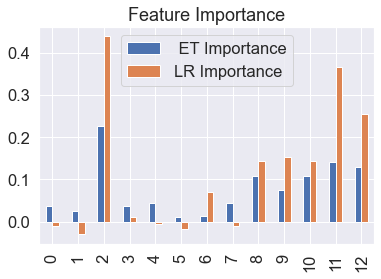

In [52]:
## Visualizing Feature Importances Graphically
features_imp.plot.bar(title="Feature Importance",legend=True)

**ET IMPORTANCE**: Blue bars show the importance of features for Extra Trees Classifier. The greater the value, the greater the importance of the features.

**LR IMPORTANCE**: Orange bars show the importance of features for Logistic Regression. The greater the value(on either sides of 0), the greater is the importance of the features. Negative values imply a negative correlation between the feature and condition.

## APPLICATION OF EACH MODEL TO SELECTED PARAMETERS

In [53]:
features_et = ['cp','thalach','exang','ca',
               'thal','slope','oldpeak'] ## Important features for Extra Trees Classifier.

features_log_reg = ['cp','exang','oldpeak',
                    'slope','ca','thal'] ## Important features for Logistic Regression 

X1 = X[features_et]
X2 = X[features_log_reg]
y = df.condition
np.random.seed(42)




In [54]:
test_X1, train_X1, test_y, train_y = train_test_split(X1,y,test_size=0.2)

model1 = ExtraTreesClassifier(max_leaf_nodes=10, n_estimators=120)

model1.fit(train_X1,train_y)

s_test_et=model1.score(test_X1,test_y)
print('EXTRA TREES CLASSIFIER SCORE ON TEST DATA:'+str(s_test_et))

EXTRA TREES CLASSIFIER SCORE ON TEST DATA:0.8565400843881856


In [55]:
s_train_et=model1.score(train_X1,train_y)
print('EXTRA TREES CLASSIFIER SCORE ON TRAINING DATA:'+str(s_train_et))

EXTRA TREES CLASSIFIER SCORE ON TRAINING DATA:0.9166666666666666


In [56]:
test_X2, train_X2, test_y, train_y = train_test_split(X2,y,test_size=0.2)

model2 = LogisticRegression(C=0.06723357536499334, solver='liblinear')

model2.fit(train_X2,train_y)

s_test_log_reg=model2.score(test_X2,test_y)
print('LOGISTIC REGRESSION SCORE ON TEST DATA:'+str(s_test_log_reg))

LOGISTIC REGRESSION SCORE ON TEST DATA:0.8227848101265823


In [57]:
s_train_log_reg=model2.score(train_X2,train_y)
print('LOGISTIC REGRESSION SCORE ON TRAINING DATA:'+str(s_train_log_reg))

LOGISTIC REGRESSION SCORE ON TRAINING DATA:0.75


## MODEL SCORES ON TRAIN AND TEST DATA

In [58]:
scores = pd.DataFrame({'TRAIN SCORE':[s_train_et,s_train_log_reg],
                       'TEST SCORE':[s_test_et,s_test_log_reg]}, 
                      index=['Éxtra Trees Classifier','Logistic Regression'])
scores

,TRAIN SCORE,TEST SCORE
Éxtra Trees Classifier,0.916667,0.856540
Logistic Regression,0.750000,0.822785


### FINAL DECISION ON MODEL

The small table above is the conclusion of the entire project. After comparing the two models on a variety of performance metrics, we have reached the following conclusion:

* The Extra Trees Classifier model has performed extremely well on the training data. After tuning the model, using the best set of parameters and selecting the important features, we have obtained a considerably high training score of **91.67%**.

* The Logistic Regression model was expected to perform reasonably well on the training data. This is because the model had given us a good score (around **83.5%**) even without tuning. However it is a very unusual and surprising discovery that the model could give us a score of merely **75%** on the training data, even after hyperparameter tuning and feature selection.

* The Extra Trees Classifier performs reasonably well on test data, givibg a score of **85.65%**. Thus we have been successful in our primary objective of obtaining a model which can provide predictions with at least **85%** accuracy.

* Although the Logistic Regression Model underperformed on the training data, it gives us an accuracy of **82.23%** on the test data, which is a surprising result again.


#### CONCLUSION: 
For making final predictions, we will use our customised Extra Trees Classifier Model with inputs for only the following features:

* CHEST PAIN (cp)
* MAXIMUM HEART RATE ACHIEVED (thalach)
* EXERCISE INDUCED ANGINA (exang)
* ST DEPRESSION INDUCED BY EXERCISE (oldpeak)
* SLOPE OF PEAK EXERCISE ST SEGMENT(slope)
* NUMBER OF MAJOR VESSELS COLOURED BY FLUOROSCOPY(ca)
* THALIUM INDUCED STRESS (thal)

## COMPARISON OF FINAL PREDICTIONS WITH TEST DATA

The table below shows how our model has fared. Legend:
* 1: Presence of Heart Disease
* 0: Absence of Heart Disease

In [63]:
preds_val = pd.DataFrame({"Actual Test Result":test_y, 'Predicted Result':y_preds1})
preds_val["Actual Test Result"] = preds_val["Actual Test Result"].map({1:"Presence of Heart Disease",0:'Absence of Heart Disease'})
preds_val["Predicted Result"] = preds_val["Predicted Result"].map({1:"Presence of Heart Disease",0:'Absence of Heart Disease'})
preds_val.head(20)


,Actual Test Result,Predicted Result
163,Presence of Heart Disease,Presence of Heart Disease
120,Absence of Heart Disease,Presence of Heart Disease
2,Absence of Heart Disease,Absence of Heart Disease
164,Presence of Heart Disease,Absence of Heart Disease
182,Presence of Heart Disease,Presence of Heart Disease
71,Absence of Heart Disease,Absence of Heart Disease
271,Absence of Heart Disease,Absence of Heart Disease
285,Absence of Heart Disease,Presence of Heart Disease
60,Absence of Heart Disease,Absence of Heart Disease
133,Presence of Heart Disease,Presence of Heart Disease


## LIMITATIONS AND FUTURE SCOPE

This project was an attempt at making a model to solve a binary classification problem. Despite the detailed analysis of data and an intricate attempt at modelling, there are certain limitations in the project.

* There is a scope for improvement in the dataset used for this project. Data should be collected from a greater number of female patients. More number of diabetic patients should also be included in the primary analysis. 
* If the entire modelling process is repeated after removing the outliers from the numerical data, there is a chance of getting improved accuracy in the resulting model.
* The classifying algorithms used for this project are the algorithms provided to us by scikit learn. More advanced classification algorithms like XGBoost or CatBoost might give us improved results.
* Deep Learning algorithms can also bring about a significant improvement in the accuracy of the model
* For this particular project, the presence of false negatives is worse than presence of false positives. Although there is a combined total of only 37 false predictions from the data, the number of false negatives obtained (25) is greater than the number of false positives(12)
* The accuracy of Logistic Regression on the training data decreased considerably after hyperparameter tuning. This was an unexpected result, especially because other performance metrics obtained for the logistic regression model were very high. Further analysis needs to be done to determine the cause of this anomaly and to find a way to mend it.